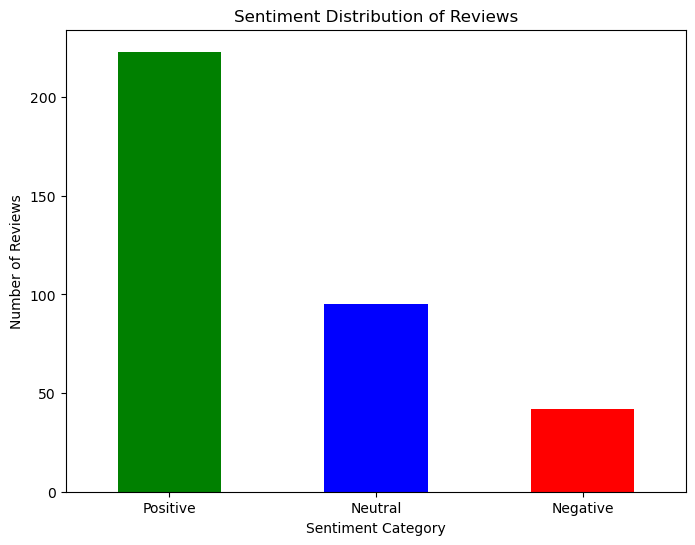

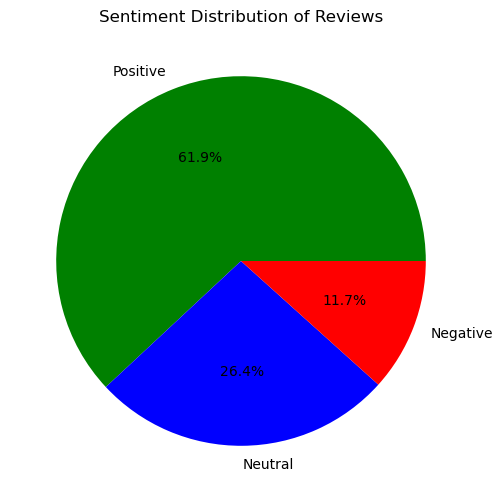

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import ast

# Load the dataset
df = pd.read_csv('processed-reviewsv2.csv')

# Convert string representation of lists in 'processed_review' to actual lists
df['processed_review'] = df['processed_review'].apply(ast.literal_eval)

# Join tokens to form a clean text string
df['clean_text'] = df['processed_review'].apply(lambda x: ' '.join(x))

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Categorize sentiments
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Count sentiment categories
sentiment_counts = df['sentiment_category'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Plot pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('')
plt.show()